# Web Scraping for Fun and Profit
<img align="right" style="padding-right:10px;" src="figures_8/Hanshintigerslogo.png" width=200><br>
Collecting sports statistics is almost the "Hello World" of web scraping projects. Let's see if we can make it a little more interesting. 

**(Pointless backstory)**

My wife is from Japan and over the years I've learned that the Japanese people love baseball as much as, or possibly even more than, Americans.  We've gone to see the local pro team, the Hanshin Tigers (Japanese: 阪神タイガース), a couple of times when visiting family and I've always wondered how Japanese players compare to American. In this assignment we will answer part of that question by comparing batting statistics for teams in Japan's Central League to teams in the US National League West.

## Moneyball meet Sabermetrics

The 2011 movie Moneyball () shows how Oakland A's general manager, Billy Beane, used statistics to build a low-cost winning team in 2002. The use of statistical analysis to evaluate player and team performance is called **sabermetrics** and can trace its lineage to Earnshaw Cook's 1964 book, "Percentage Baseball" (Wikipedia)

We will be using a calculation from sabermetrics called **Base Runs** to evaluate team batting performance. Base runs uses several of the "on base" statistics for players or entire teams to estimate an offensive potential. The base runs calculation will be discussed in more detail below.

**_Your job:_** create a "base runs" column and calculate base runs for each team for each year statistics are available and then do comparative analysis and visualization to determine Japanese vs. American baseball. 

***

Moneyball: https://www.imdb.com/title/tt1210166/, https://en.wikipedia.org/wiki/Moneyball_(film)
Sabermetrics: https://en.wikipedia.org/wiki/Sabermetrics
SABR (Society for American Baseball Research) website: https://sabr.org/

## Data Source

We will be using https://www.baseball-reference.com/ to gather our statistics. Their data is very well organized and the HTML is well-labeled and easy to navigate.


### Japan Data

**Japan Central League:** https://www.baseball-reference.com/register/league.cgi?code=JPCL&class=Fgn

The Japan Central League is composed of 6 teams, **Chunichi Dragons, Hanshin Tigers, Hiroshima Carp, Yakult Swallows, Yokohama Bay Stars, Yomiuri Giants** (actually, some years had more teams), with data stretching back to 1950 organized into a table of links for teams for each year.

<img align="left" style="padding-right:10px;" src="figures_8/Japan_Central_League.png" width=800><br>

It should be a relatively easy task to scrape a list of links for each year (hint: think "dictionary")

### Batting Stats

Clicking a year link will take you to tables of league statistics for that year. To keep things simple, we will only scrape the second table -- **"League Batting"**.

<img style="padding-right:10px;" src="figures_8/2019_Japan_Central_Batting.png" width=800><br>
<br><br>
Collect each team's statistics from the table and ignore the League Totals at the bottom of the table.

## US Data

The US National League West is composed of six teams: **Arizona Diamondbacks, Colorado Rockies, Los Angeles Dodgers , San Diego Padres, San Francisco Giants.** 

1. It is considerably less straightforward to get team stats for US teams. The best place I found to get links for all six teams is at the bottom of the main page in the "Full Site Menu" as seen in the picture below.

<img align="left" style="padding-right:10px;" src="figures_8/MLB_Stats.png" width=200><br>

2. Following one of the team links will take you to a team page. Underneath the main table on that page is a link to "Batting" under "Year-by-year Stats".

<img align="left" style="padding-right:10px;" src="figures_8/Colorado_Rockies_Team_History.png" width=400><br>

Following that link will take you to the page with batting statistics organized by year:

<img align="left" style="padding-right:10px;" src="figures_8/Colorado_Rockies_Team_Yearly_Batting_Stats.png" width=400><br>

## Base Runs

After you have collected all the data for all the teams and all the years, it is time to create the **base runs** column. According to http://tangotiger.net/wiki_archive/Base_Runs.html (linked from the SABR site), the formula to calculate base runs is:

`A*B/(B + C) + D`

Where:

```
A = H + BB - HR
B = (1.4*SLG - .6*H - 3*HR + .1*BB)*1.02
C = AB - H
D = HR
```

<img style="padding-right:10px;" src="figures_8/Colorado_Rockies_Detail.png" width=800><br>

*Note: There is a discrepancy between labeling of columns at Baseball-Reference and the Tangotiger formula. I've adjusted the formula to match Baseball-Reference.

***

Using the information above, for 2019:

A = 1502 + 489 - 224 **= 1,767**<br>
B = (1.4 * .456 - .6 * 1502 - .1 * 489) * 1.02 **= -968.450832**<br>
C = 5660 - 1502 **= 4158**<br>
D = **224**<br>

A*B/(B + C) + D = 1,767 * -968.450832 / (-968.450832 + 4158) + 224

= -312.518652013

***

Unfortunately, one of the weaknesses of base runs is that the answer can come out negative -- clearly a team cannot score **negative** runs in a season so you will have to decide how to deal with this problem.

## A Word About HTML and Nested Tags

A couple of decades ago, the US government finished a project that defined in excruciating detail how government documents would be formatted. More accurately, it defined the language used to create the formatting. This language is called **SGML** - Standard Generalized Markup Language. SGML is actually a language that defines rules for creating markup languages and it is the basis for HTML, XML, BPML, CML, and hundreds of others. 

SGML specifies that markup tags can be nested within each other, which has proven problematic for both HTML designers and parsers alike. This nesting forms a barrier to HTML parsing for many pages that we will want to scrape, including the Baseball-Reference page.

<img style="padding-right:10px;" src="figures_8/nested.png" width=1000><br>

***

### Helpful Hints

This assignment consists of 3 major sections:<br>
1. Gather links to pages containing data by scraping tables.
2. Scrape data from HTML tables into Pandas tables.
3. Calculate new statistic and create visualizations.

In these sports pages, tables are buried under several levels of nested \<div> tags. Let's grab data off the hockey page to demonstrate. 

In [1]:
from gazpacho import get, Soup
import pandas as pd

In [2]:
state = f'COL'
year = f'2016'
base = f'https://www.hockey-reference.com'
page = f'/teams/{state}/{year}.html'

In [3]:
url = f'{base}{page}'
html = get(url)
soup = Soup(html)

In [4]:
div = soup.find('div')

This gives us the top-level \<div> and everything inside. Now we can look for the table. NOTE: the `find()` method returns a list.

In [5]:
df = pd.read_html(str(div[0].find('table')))[0]

In [6]:
df

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,PPOA,PK%,SH,SHA,S,S%,SA,SV%,PDO,SO
0,Colorado Avalanche,28.3,82,39,39,4,82,0.500,212,240,...,258,80.23,7,9,2348,9.0,2649,0.909,100.5,5
1,League Average,28.0,82,41,32,9,91,0.556,219,219,...,255,81.34,6,6,2438,9.0,2438,0.910,NaN,5


In this case, we were scraping the actual data so I converted it to a DataFrame. In the case of harvesting links, you probably want to use the raw list that the `find()` gives you and pull the link.

### Deliverable

Your job is to present a comparative analysis between Japanese Central League baseball teams and American National League West teams using the **"base run"** statistic calculated from data scraped from the Baseball-Reference website. This analysis should contain tables and visualizations to support an ultimate answer to which country's baseball teams are stronger. You are free to use any combination of requests, beautifulsoup, gazpacho, scrapy, etc. that you feel comfortable with to gather the data and any visualization library you want.  

<div class="alert alert-block alert-warning">
<b>Note:</b> As noted in the Zoom session this evening, we discovered that the American league batting tables are not easily parsed.  Here is a solution for working with these tables.
</div>

In [8]:
# url for Colorado Rockies Year-by-Year Batting
url_mlb="https://www.baseball-reference.com/teams/COL/batteam.shtml"

html = get(url_mlb)
soup = Soup(html)    

In [9]:
# parse the outter level 'div'
div = soup.find('div',{'id':'content'},mode='all')

In [10]:
# Reconstruct the html string to represent what we want it to look like
table = str(div[0].find('table', {'id':'yby_team_bat'})) + str(div[0].find('tbody')) + '</table>'

In [14]:
# read into a pd dataframe
df = pd.read_html(table)[0]

In [16]:
df.head(10)

,Year,Lg,W,L,Finish,R/G,G,PA,AB,R,...,BB,SO,"Gold means awarded title at end of year."" data-filter=""1"" data-name=""Batting Average"">BA",OBP,SLG,OPS,E,DP,Fld%,BatAge
0,2019,NL West,71,91,4,5.15,162,6288,5660,835,...,489,1503,0.265,0.326,0.456,0.782,97,165,0.984,28.2
1,2018,NL West,91,72,2,4.79,163,6178,5541,780,...,507,1397,0.256,0.322,0.435,0.757,74,162,0.988,28.7
2,2017,NL West,87,75,3,5.09,162,6201,5534,824,...,519,1408,0.273,0.338,0.444,0.781,77,168,0.987,28.3
3,2016,NL West,75,87,3,5.22,162,6236,5614,845,...,494,1330,0.275,0.336,0.457,0.794,110,148,0.982,27.8
4,2015,NL West,68,94,5,4.55,162,6071,5572,737,...,388,1283,0.265,0.315,0.432,0.748,95,171,0.985,28.0
5,2014,NL West,66,96,4,4.66,162,6164,5612,755,...,397,1281,0.276,0.327,0.445,0.772,106,166,0.983,27.4
6,2013,NL West,74,88,5,4.36,162,6152,5599,706,...,427,1204,0.270,0.323,0.418,0.741,90,162,0.986,27.7
7,2012,NL West,64,98,5,4.68,162,6183,5577,758,...,450,1213,0.274,0.330,0.436,0.766,122,139,0.980,28.1
8,2011,NL West,73,89,4,4.54,162,6275,5544,735,...,555,1201,0.258,0.329,0.410,0.739,98,156,0.984,28.6
9,2010,NL West,83,79,3,4.75,162,6265,5530,770,...,585,1274,0.263,0.336,0.425,0.760,101,182,0.984,28.8


<div class="alert alert-block alert-warning">
<b>Note:</b> Notice the odd column name in the middle of the dataframe header. We might want to clean this up.
</div>

Assignment

Part 1: Getting Japan Yearly URL id

In [89]:
from gazpacho import get, Soup
import pandas as pd, re

In [90]:
# url for Colorado Rockies Year-by-Year Batting
url_mlb="https://www.baseball-reference.com/register/league.cgi?code=JPCL&class=Fgn"

html = get(url_mlb)
soup = Soup(html)    

In [91]:
div = soup.find('div',{'id':'content'},mode='all')

In [92]:
table = str(div[0].find('tbody')) 

In [93]:
a=[table.start() for table in re.finditer('data-stat="year_ID', table)]
b=[table.start() for table in re.finditer('</a></th><td class="left "', table)]

In [94]:
list=[]
list2=[]
for x in range(0,22):
    test=table[a[x]:b[x]]
    test2=test.replace('data-stat="year_ID"><a href="/register/league.cgi?id=','')
    test3=test2.replace('">',',')
    list.append(test3[:8])
    list2.append(test3)
    print(test3+' ' +test3[:8]) 

7f5a1dca,2019 7f5a1dca
8449fb1b,2018 8449fb1b
5ed71981,2017 5ed71981
fa996fac,2016 fa996fac
ef7a4bc6,2015 ef7a4bc6
cbf62e9e,2014 cbf62e9e
00cea8f5,2013 00cea8f5
d45883da,2012 d45883da
c512db3e,2011 c512db3e
0e8aae4b,2010 0e8aae4b
98417e4d,2009 98417e4d
d2b06889,2008 d2b06889
102ee2ae,2007 102ee2ae
bd17499f,2006 bd17499f
4ce6298f,2005 4ce6298f
2a13bfad,2004 2a13bfad
5f92acab,2003 5f92acab
b9ec01cb,2002 b9ec01cb
f0f9b0a0,2001 f0f9b0a0
bbaa3356,2000 bbaa3356
3231e024,1999 3231e024
1b91c1f4,1998 1b91c1f4


In [103]:
list2

['7f5a1dca,2019',
 '8449fb1b,2018',
 '5ed71981,2017',
 'fa996fac,2016',
 'ef7a4bc6,2015',
 'cbf62e9e,2014',
 '00cea8f5,2013',
 'd45883da,2012',
 'c512db3e,2011',
 '0e8aae4b,2010',
 '98417e4d,2009',
 'd2b06889,2008',
 '102ee2ae,2007',
 'bd17499f,2006',
 '4ce6298f,2005',
 '2a13bfad,2004',
 '5f92acab,2003',
 'b9ec01cb,2002',
 'f0f9b0a0,2001',
 'bbaa3356,2000',
 '3231e024,1999',
 '1b91c1f4,1998']

In [121]:
str(list2[0])[:9]

'7f5a1dca,'

In [129]:
str(list2[0])[9:]

'2019'

Obtain Japan Data

In [41]:
Japan = pd.DataFrame()
for ids in list:
    URL='https://www.baseball-reference.com/register/league.cgi?id='
    year_id=ids
    FULL_URL=URL+year_id
    html = get(FULL_URL)
    soup = Soup(html)
    table=str(soup)[str(soup).find('<table class="sortable stats_table" id="league_batting"'):]
    Japan = Japan.append(pd.read_html(table)[0])
    #Japan=df.append(df2)
    print(ids+' '+FULL_URL)

7f5a1dca https://www.baseball-reference.com/register/league.cgi?id=7f5a1dca
8449fb1b https://www.baseball-reference.com/register/league.cgi?id=8449fb1b
5ed71981 https://www.baseball-reference.com/register/league.cgi?id=5ed71981
fa996fac https://www.baseball-reference.com/register/league.cgi?id=fa996fac
ef7a4bc6 https://www.baseball-reference.com/register/league.cgi?id=ef7a4bc6
cbf62e9e https://www.baseball-reference.com/register/league.cgi?id=cbf62e9e
00cea8f5 https://www.baseball-reference.com/register/league.cgi?id=00cea8f5
d45883da https://www.baseball-reference.com/register/league.cgi?id=d45883da
c512db3e https://www.baseball-reference.com/register/league.cgi?id=c512db3e
0e8aae4b https://www.baseball-reference.com/register/league.cgi?id=0e8aae4b
98417e4d https://www.baseball-reference.com/register/league.cgi?id=98417e4d
d2b06889 https://www.baseball-reference.com/register/league.cgi?id=d2b06889
102ee2ae https://www.baseball-reference.com/register/league.cgi?id=102ee2ae
bd17499f htt

In [139]:
Japan = pd.DataFrame()
for ids in list2:
    URL='https://www.baseball-reference.com/register/league.cgi?id='
    year_id=str(ids)[:8]
    FULL_URL=URL+year_id
    html = get(FULL_URL)
    soup = Soup(html)
    table=str(soup)[str(soup).find('<table class="sortable stats_table" id="league_batting"'):]
    df=pd.read_html(table)[0]
    df['Year']=str(ids)[9:]
    Japan = Japan.append(df)
    print(str(ids)[9:]+' '+str(ids)[:8]+' '+FULL_URL)

2019 7f5a1dca https://www.baseball-reference.com/register/league.cgi?id=7f5a1dca
2018 8449fb1b https://www.baseball-reference.com/register/league.cgi?id=8449fb1b
2017 5ed71981 https://www.baseball-reference.com/register/league.cgi?id=5ed71981
2016 fa996fac https://www.baseball-reference.com/register/league.cgi?id=fa996fac
2015 ef7a4bc6 https://www.baseball-reference.com/register/league.cgi?id=ef7a4bc6
2014 cbf62e9e https://www.baseball-reference.com/register/league.cgi?id=cbf62e9e
2013 00cea8f5 https://www.baseball-reference.com/register/league.cgi?id=00cea8f5
2012 d45883da https://www.baseball-reference.com/register/league.cgi?id=d45883da
2011 c512db3e https://www.baseball-reference.com/register/league.cgi?id=c512db3e
2010 0e8aae4b https://www.baseball-reference.com/register/league.cgi?id=0e8aae4b
2009 98417e4d https://www.baseball-reference.com/register/league.cgi?id=98417e4d
2008 d2b06889 https://www.baseball-reference.com/register/league.cgi?id=d2b06889
2007 102ee2ae https://www.ba

In [140]:
Japan

,2B,3B,AB,Aff,BA,BB,BatAge,CS,Finals,G,...,R/G,RBI,SB,SF,SH,SLG,SO,TB,Tm,Year
0,221,15,4835,NaN,0.257,540,28.9,20,NaN,143,...,4.64,627,83,31,84,0.422,1205,2042,Yomiuri Giants,2019
1,205,19,4833,NaN,0.244,570,28.3,25,NaN,143,...,4.59,630,62,29,84,0.398,1212,1925,Yakult Swallows,2019
2,210,14,4778,NaN,0.246,449,28.2,26,NaN,143,...,4.17,575,40,26,81,0.398,1065,1904,Yokohama Bay Stars,2019
3,216,17,4852,NaN,0.254,479,27.5,43,NaN,143,...,4.13,562,81,26,111,0.392,1106,1902,Hiroshima Carp,2019
4,240,31,4816,NaN,0.263,349,28.9,34,NaN,143,...,3.94,545,63,29,108,0.381,1024,1837,Chunichi Dragons,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,206,18,4630,NaN,0.265,462,28.6,46,NaN,135,...,4.28,547,86,32,91,0.402,843,1861,Hiroshima Carp,1998
3,179,17,4504,NaN,0.253,364,29.2,39,NaN,135,...,3.65,475,56,26,118,0.365,817,1645,Yakult Swallows,1998
4,171,22,4417,NaN,0.248,534,28.4,41,NaN,136,...,3.59,469,91,30,129,0.365,841,1610,Chunichi Dragons,1998
5,197,16,4469,NaN,0.242,381,28.8,27,NaN,135,...,3.33,422,28,20,122,0.351,933,1567,Hanshin Tigers,1998


In [141]:
Japan['Country']='Japan'

Obtain USA Data

In [60]:
NLW =['ARI','COL','LAD','SDP','SFG']

In [62]:
USA = pd.DataFrame()
for teams in NLW:
    state = teams
    base = f'https://www.baseball-reference.com'
    page = f'/teams/{state}/batteam.shtml'
    url = f'{base}{page}'
    print(state+ ' '+url)
    html = get(url)
    soup = Soup(html)
    div = soup.find('div',mode='all')
    table = str(div[0].find('table', {'id':'yby_team_bat'})) + str(div[0].find('tbody')) + '</table>'
    USA = USA.append(pd.read_html(table)[0])

ARI https://www.baseball-reference.com/teams/ARI/batteam.shtml
COL https://www.baseball-reference.com/teams/COL/batteam.shtml
LAD https://www.baseball-reference.com/teams/LAD/batteam.shtml
SDP https://www.baseball-reference.com/teams/SDP/batteam.shtml
SFG https://www.baseball-reference.com/teams/SFG/batteam.shtml


In [63]:
USA

,Year,Lg,W,L,Finish,R/G,G,PA,AB,R,...,BB,SO,"Gold means awarded title at end of year."" data-filter=""1"" data-name=""Batting Average"">BA",OBP,SLG,OPS,E,DP,Fld%,BatAge
0,2019,NL West,85,77,2,5.02,162,6315,5633,813,...,540,1360,0.252,0.323,0.434,0.757,86,136,0.986,28.7
1,2018,NL West,82,80,3,4.28,162,6157,5460,693,...,560,1460,0.235,0.310,0.397,0.707,75,152,0.988,29.2
2,2017,NL West,93,69,2,5.01,162,6224,5525,812,...,578,1456,0.254,0.329,0.445,0.774,108,140,0.982,28.3
3,2016,NL West,69,93,4,4.64,162,6260,5665,752,...,463,1427,0.261,0.320,0.432,0.752,101,143,0.983,26.7
4,2015,NL West,79,83,3,4.44,162,6276,5649,720,...,490,1312,0.264,0.324,0.414,0.738,86,146,0.986,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1887,NL,68,55,4,6.33,129,4924,4516,816,...,361,326,0.279,0.339,0.389,0.727,431,83,0.920,28.4
133,1886,NL,75,44,3,5.58,124,4535,4298,692,...,237,410,0.269,0.307,0.356,0.663,359,70,0.929,29.3
134,1885,NL,85,27,2,6.17,112,4250,4029,691,...,221,312,0.269,0.307,0.359,0.666,331,85,0.929,28.5
135,1884,NL,62,50,4,5.97,116,4373,4124,693,...,249,492,0.255,0.298,0.340,0.638,514,69,0.895,26.6


In [64]:
USA=USA.rename(columns = {'Gold means awarded title at end of year." data-filter="1" data-name="Batting Average">BA':'BA'})

In [66]:
USA['Country']='USA'

In [67]:
USA.head()

,Year,Lg,W,L,Finish,R/G,G,PA,AB,R,...,SO,BA,OBP,SLG,OPS,E,DP,Fld%,BatAge,Country
0,2019,NL West,85,77,2,5.02,162,6315,5633,813,...,1360,0.252,0.323,0.434,0.757,86,136,0.986,28.7,USA
1,2018,NL West,82,80,3,4.28,162,6157,5460,693,...,1460,0.235,0.310,0.397,0.707,75,152,0.988,29.2,USA
2,2017,NL West,93,69,2,5.01,162,6224,5525,812,...,1456,0.254,0.329,0.445,0.774,108,140,0.982,28.3,USA
3,2016,NL West,69,93,4,4.64,162,6260,5665,752,...,1427,0.261,0.320,0.432,0.752,101,143,0.983,26.7,USA
4,2015,NL West,79,83,3,4.44,162,6276,5649,720,...,1312,0.264,0.324,0.414,0.738,86,146,0.986,26.6,USA


In [69]:
IndexNames=USA[USA['Year']<1998].index
USA.drop(IndexNames, inplace=True)

Clean data

In [142]:
USA.columns

Index(['Year', 'Lg', 'W', 'L', 'Finish', 'R/G', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'E', 'DP', 'Fld%', 'BatAge', 'Country', 'A'],
      dtype='object')

In [143]:
USA_Cleaned=USA[['Country','Year','H','BB','HR','SLG','AB']]

In [144]:
USA_Cleaned['A'] = USA_Cleaned.H + USA_Cleaned.BB - USA_Cleaned.HR
USA_Cleaned['B'] = (1.4*USA_Cleaned.SLG -.6*USA_Cleaned.H - 3*USA_Cleaned.HR)*1.02
USA_Cleaned['C'] = USA_Cleaned.AB- USA_Cleaned.H
USA_Cleaned['D'] = USA_Cleaned.HR
USA_Cleaned['BR'] = USA_Cleaned.A*USA_Cleaned.B/(USA_Cleaned.B + USA_Cleaned.C) + USA_Cleaned.D
USA_Cleaned

C:\Users\eltac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eltac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eltac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Country,Year,H,BB,HR,SLG,AB,A,B,C,D,BR
0,USA,2019,1419,540,220,0.434,5633,1739,-1541.008248,4214,220,-782.552044
1,USA,2018,1283,560,176,0.397,5460,1667,-1323.189084,4177,176,-596.916030
2,USA,2017,1405,578,220,0.445,5525,1763,-1532.424540,4120,220,-824.091083
3,USA,2016,1479,463,190,0.432,5665,1752,-1485.931104,4186,190,-774.179580
4,USA,2015,1494,490,154,0.414,5649,1830,-1384.976808,4155,154,-760.977018
...,...,...,...,...,...,...,...,...,...,...,...,...
17,USA,2002,1465,616,198,0.442,5497,1883,-1501.828824,4032,198,-919.688678
18,USA,2001,1493,625,235,0.460,5612,1883,-1632.159120,4119,235,-1000.847314
19,USA,2000,1535,709,226,0.472,5519,2018,-1630.305984,3984,226,-1171.784696
20,USA,1999,1507,696,188,0.434,5563,2015,-1496.944248,4056,188,-990.693609


In [145]:
Japan_Cleaned=Japan[['Country','Year','H','BB','HR','SLG','AB']]

In [146]:
Japan_Cleaned['A'] = Japan_Cleaned.H + Japan_Cleaned.BB - Japan_Cleaned.HR
Japan_Cleaned['B'] = (1.4*Japan_Cleaned.SLG -.6*Japan_Cleaned.H - 3*Japan_Cleaned.HR)*1.02
Japan_Cleaned['C'] = Japan_Cleaned.AB- Japan_Cleaned.H
Japan_Cleaned['D'] = Japan_Cleaned.HR
Japan_Cleaned['BR'] = Japan_Cleaned.A*Japan_Cleaned.B/(Japan_Cleaned.B + Japan_Cleaned.C) + Japan_Cleaned.D
Japan_Cleaned

C:\Users\eltac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eltac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eltac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Country,Year,H,BB,HR,SLG,AB,A,B,C,D,BR
0,Japan,2019,1242,540,183,0.422,4835,1599,-1319.481384,3593,183,-745.011197
1,Japan,2019,1181,570,167,0.398,4833,1584,-1233.223656,3652,167,-640.609300
2,Japan,2019,1177,449,163,0.398,4778,1463,-1218.535656,3601,163,-585.266252
3,Japan,2019,1232,479,140,0.392,4852,1571,-1181.824224,3620,140,-621.489747
4,Japan,2019,1265,349,90,0.381,4816,1524,-1049.035932,3551,90,-548.990296
...,...,...,...,...,...,...,...,...,...,...,...,...
2,Japan,1998,1226,462,131,0.402,4630,1557,-1150.597944,3404,131,-664.011700
3,Japan,1998,1141,364,97,0.365,4504,1408,-994.590780,3363,97,-494.276122
4,Japan,1998,1095,534,100,0.365,4417,1529,-975.618780,3322,100,-535.753944
5,Japan,1998,1080,381,86,0.351,4469,1375,-923.618772,3389,86,-429.123502


In [147]:
Data=pd.concat([USA_Cleaned,Japan_Cleaned])

In [148]:
Data

,Country,Year,H,BB,HR,SLG,AB,A,B,C,D,BR
0,USA,2019,1419,540,220,0.434,5633,1739,-1541.008248,4214,220,-782.552044
1,USA,2018,1283,560,176,0.397,5460,1667,-1323.189084,4177,176,-596.916030
2,USA,2017,1405,578,220,0.445,5525,1763,-1532.424540,4120,220,-824.091083
3,USA,2016,1479,463,190,0.432,5665,1752,-1485.931104,4186,190,-774.179580
4,USA,2015,1494,490,154,0.414,5649,1830,-1384.976808,4155,154,-760.977018
...,...,...,...,...,...,...,...,...,...,...,...,...
2,Japan,1998,1226,462,131,0.402,4630,1557,-1150.597944,3404,131,-664.011700
3,Japan,1998,1141,364,97,0.365,4504,1408,-994.590780,3363,97,-494.276122
4,Japan,1998,1095,534,100,0.365,4417,1529,-975.618780,3322,100,-535.753944
5,Japan,1998,1080,381,86,0.351,4469,1375,-923.618772,3389,86,-429.123502


In [263]:
Data.to_csv('C:/Users/eltac/Downloads/Baseball.csv')

In [255]:
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import numpy as np

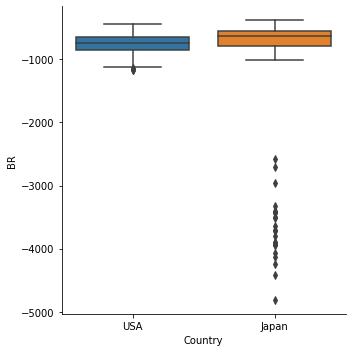

In [150]:
sns.catplot('Country', 'BR', data=Data, kind='box')

In [166]:
Data2=Data[['Country','Year','BR']]

In [240]:
Data3=Data2.groupby(['Year','Country'],as_index=False).mean()

In [241]:
Data3

,Year,Country,BR
0,1998,USA,-802.603283
1,1999,USA,-957.453303
2,2000,USA,-946.887413
3,2001,USA,-925.957281
4,2002,USA,-802.061824
5,2003,USA,-757.560279
6,2004,USA,-851.770936
7,2005,USA,-726.906792
8,2006,USA,-815.137423
9,2007,USA,-775.109967


In [252]:
pv = pd.pivot_table(Data2, index=Data2.Year, columns=Data2.Country, values='BR', aggfunc='mean')

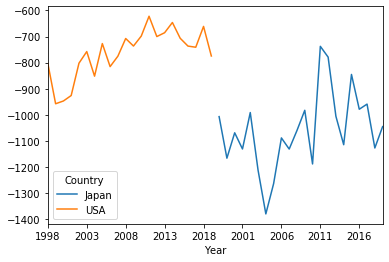

In [253]:
pv.plot()

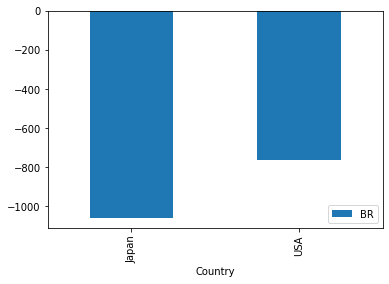

In [213]:
Data4=Data2[['Country','BR']].groupby(['Country'],as_index=False).mean()
Data4.plot(kind='bar',x='Country',y='BR')
plt.show()

In [260]:
piv1 = Data2.pivot_table(index=['Year','Country'], values='BR',aggfunc=[np.mean])
piv1

,,mean
,,BR
Year,Country,
1998,USA,-802.603283
1999,USA,-957.453303
2000,USA,-946.887413
2001,USA,-925.957281
2002,USA,-802.061824
2003,USA,-757.560279
2004,USA,-851.770936
2005,USA,-726.906792


When comparing the countries there seemed to be an issue with the year column. I was still able to get charts and from these charts you could easily see that the BR for USA was consistenly better. Since this column was giving me an issue I sent the data set to a CSV and put it in a Tableau dashboard to get a better look. 

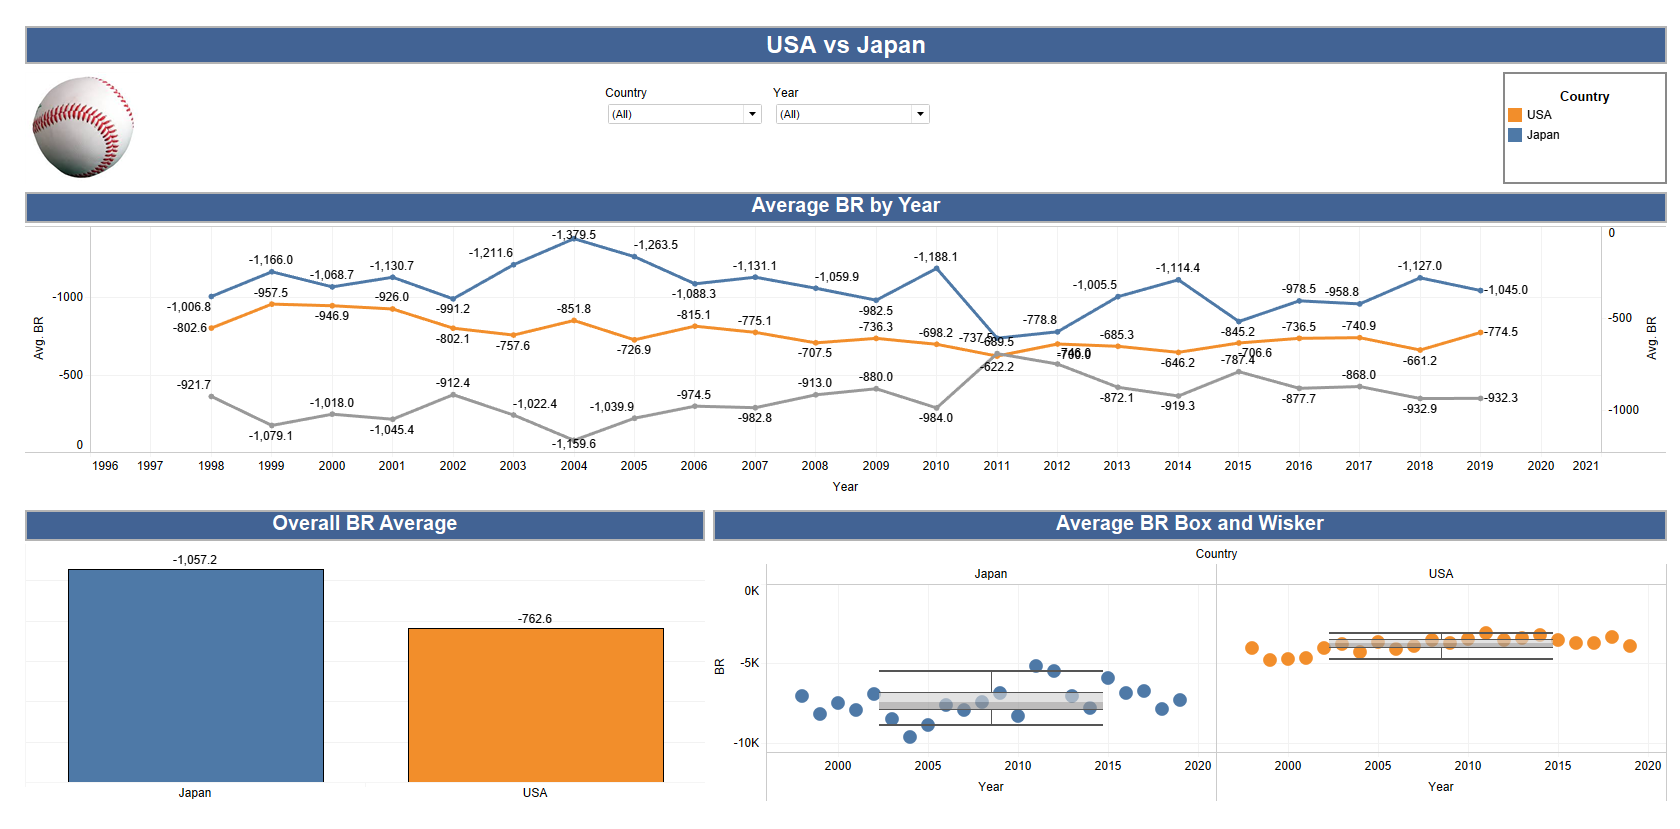

From the Tableau Dashboard we can still see that USA is still has a better BR result when compaing it the Japan league. When looking at the Average BR by year its easy to see that USA had a better BR each year and was above the overall average for one year. This dashboard clearly shows that USA has a better BR result compared to Japan